In [ ]:
# install the latest released version of PennyLane
!pip install pennylane --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 87.1 MB/s eta 0:00:00


In [ ]:
import pennylane as qml
from pennylane import numpy as np

In [ ]:
### DO NOT CHANGE ANYTHING BELOW THIS LINE



WIRES = 2
LAYERS = 5
NUM_PARAMETERS = LAYERS * WIRES * 3

def variational_circuit(params,hamiltonian):
    """
    This is a template variational quantum circuit containing a fixed layout of gates with variable
    parameters. To be used as a QNode, it must either be wrapped with the @qml.qnode decorator or
    converted using the qml.QNode function.

    The output of this circuit is the expectation value of a Hamiltonian, somehow encoded in
    the hamiltonian argument

    Args:
        - params (np.ndarray): An array of optimizable parameters of shape (30,)
        - hamiltonian (np.ndarray): An array of real parameters encoding the Hamiltonian
        whose expectation value is returned.

    Returns:
        (float): The expectation value of the Hamiltonian
    """
    parameters = params.reshape((LAYERS, WIRES, 3))
    qml.templates.StronglyEntanglingLayers(parameters, wires=range(WIRES))
    return qml.expval(qml.Hermitian(hamiltonian, wires = [0,1]))

def optimize_circuit(hamiltonian):
    """Minimize the variational circuit and return its minimum value.
    You should create a device and convert the variational_circuit function
    into an executable QNode.
    Next, you should minimize the variational circuit using gradient-based
    optimization to update the input params.
    Return the optimized value of the QNode as a single floating-point number.

    Args:
        - params (np.ndarray): Input parameters to be optimized, of dimension 30
        - hamiltonian (np.ndarray): An array of real parameters encoding the Hamiltonian
        whose expectation value you should minimize.
    Returns:
        float: the value of the optimized QNode
    """

    hamiltonian = np.array(hamiltonian, requires_grad = False)

    hamiltonian = np.array(hamiltonian,float).reshape((2 ** WIRES), (2 ** WIRES))

    ### WRITE YOUR CODE BELOW THIS LINE

    ### Solution Template

    #____dev = # Initialize the device.

    #create a device with ### quibits
    dev = qml.device('lightning.qubit', WIRES)

    #____circuit = # Instantiate the QNode from variational_circuit.

    #create a QNode with ### entangled qubits
    @qml.qnode(dev)
    def circuit():
      #creamos el entrelazamiento CAMBIAAAAAAR
      qml.Hadamard(wires=0)
      qml.CNOT(wires=[0,1])
      return qml.probs()

    # Write your code to minimize the circuit

    return # Return the value of the minimized QNode


In [ ]:
paramsss = [0.863327072347624,0.0167108057202516,0.07991447085492759,0.0854049026262154,0.0167108057202516,0.8237963773906136,-0.07695947154193797,0.03131548733285282,0.07991447085492759,-0.07695947154193795,0.8355417021014687,-0.11345916130631205,0.08540490262621539,0.03131548733285283,-0.11345916130631205,0.758156886827099]

In [ ]:
#qml.draw_mpl(variational_circuit(params,hamiltonian))()

In [ ]:
#create a device with 2 quibits
dev = qml.device('lightning.qubit', wires=2)

In [ ]:
#create a QNode with 2 entangled qubits
@qml.qnode(dev)
def circuit():
  #creamos el entrelazamiento
  qml.Hadamard(wires=0)
  qml.CNOT(wires=[0,1])
  return qml.probs()

(<Figure size 500x300 with 1 Axes>, <Axes: >)

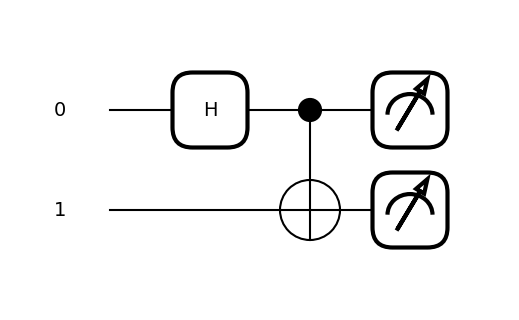

In [ ]:
#Draw circuit
#No se le pone parametros a "circuit" porque en def aun no se asigna
qml.draw_mpl(circuit)()

In [ ]:
#Run your circuit
circuit()
#En el caso de tener parametros por default seran entrenables

tensor([0.5, 0. , 0. , 0.5], requires_grad=True)

##Create a parametrized (variational) circuit with 1 qubit

In [ ]:
#Create a divece with 1 qubit
dev2 = qml.device('default.qubit', wires=1)

In [ ]:
# Create a parametrized circuit
@qml.qnode(dev2)
def circuit2(params):
    #creamos el entrelazamiento
    qml.RX(params=[0], wires=0)
    qml.RY(params=[1], wires=0)
  # Podemos medir en diferentes direcciones. En este caso medimos un valor de expectacion (expval) en el eje Z
    return qml.expval(qml.PauliZ(0))

In [ ]:
#Draw circuit
qml.draw_mpl(circuit2)([0.1,0.2])

TypeError: ignored